# CAPSTONE PROJECT-2 :- FlightPricePrediction

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("Flight_Fare.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Domain Analysis

1. Airline: This column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.


2. Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.


3. Source: This column holds the name of the place from where the passenger’s journey will start.


4. Destination: This column holds the name of the place to where passengers wanted to travel.


5. Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.


6. Dep_Time: Departure time is the time when flight take off from the source.


7. Arrival_Time: Arrival time is when the passenger will reach his/her destination.


8. Duration: This column  tells about total travel time from source to destination.


9. Total_stops: This column tells about the number of intermediate stops that flight makes between the source and destination.


10. Additional_Info : This column tells about the meal services, baggage services, layovers, red-eye-light and some data there are not given addition info.


11. Price: Price is the dependent(target) variable. It tells about the flight fare costs for whole journey.

# Basic checks

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.shape

(10683, 11)

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
data.describe(include="object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Insights

* Average price of flight fare is 9087.064$.

* There are no missing values in many columns except the column Route and Total_stops has 1 missing values

* The most people used Airline as Jet Airways and the frequency is 3849 times.

* The route the most chosen from Delhi to Cochin and in the dataset has a total of 2376 occurences for its modt frequent value.


# EDA

# Univariate Analysis

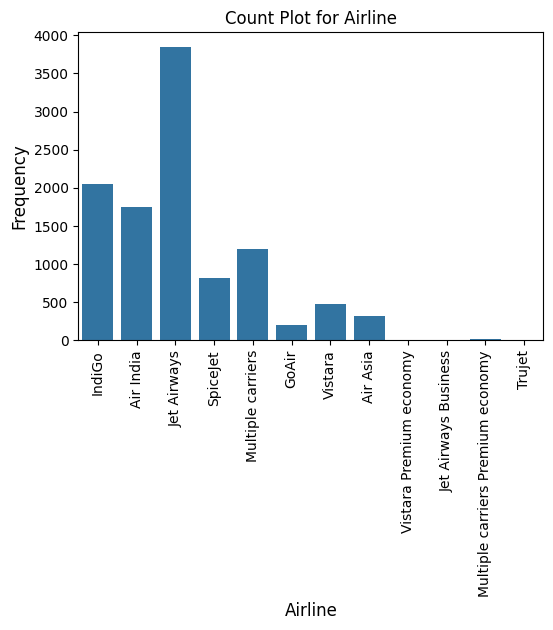

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Airline")
plt.title("Count Plot for Airline")
plt.xlabel("Airline",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Insights
* The Airline "Jet Airways" appears 3849 times is the most frequent airline in the data.
* The Airline second highest is Indigo and it appears 2053 times and the Air India indicates 1752 times frequency.

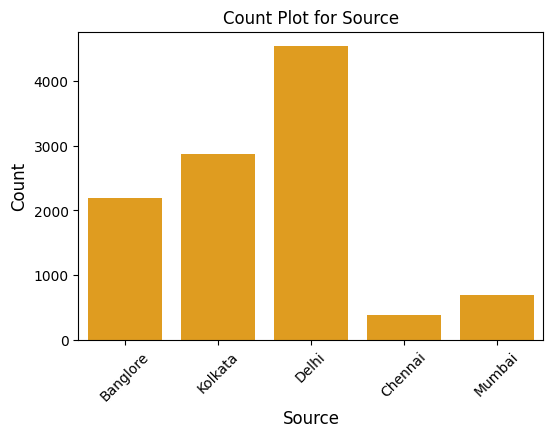

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x="Source", data=data, color="Orange")
plt.title("Count Plot for Source")
plt.xlabel("Source",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Insights

* In the dataset the highest number of counts for flight take off shows in Delhi so the most common location seems the Delhi as the source
* The Second most location seems kolkata.
* The least common location seems the Chennai as the source.

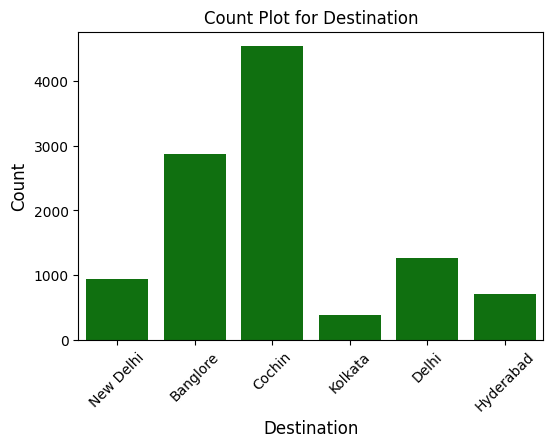

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x="Destination", data=data, color="Green")
plt.title("Count Plot for Destination")
plt.xlabel("Destination",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Insights
* In the dataset the highest number of counts for flight landing shows in Cochin so the most common location chosen the coachin as the destination.
* The Second most location seems Banglore.
* The least common location seems the Kolkata as the destination.

In [75]:
data.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

# Insights

* The most common route has selected from Delhi-Bombay-Cochin followed by Bangalore-Delhi route.

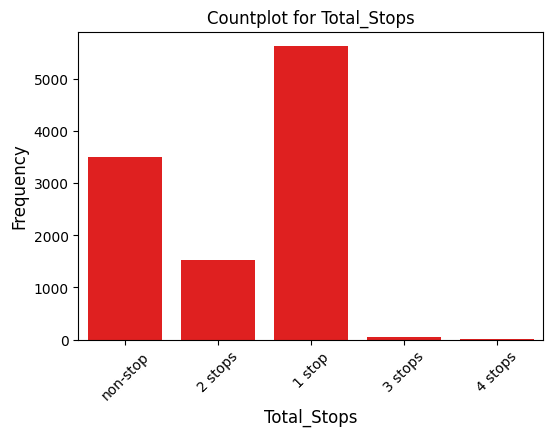

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total_Stops", data=data, color="red")
plt.title("Countplot for Total_Stops")
plt.xlabel("Total_Stops",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Insights

* Flights with one stopover are shown most common in the dataset.
* We oserverved an second higher frequency of direct flights compared to multiple stops.

In [40]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [78]:
data.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# Insights

* Mostly, there are no additional information provided by the airline.
* In some airline they added the additional information about meal and baggage services.

# Bivariate Analysis

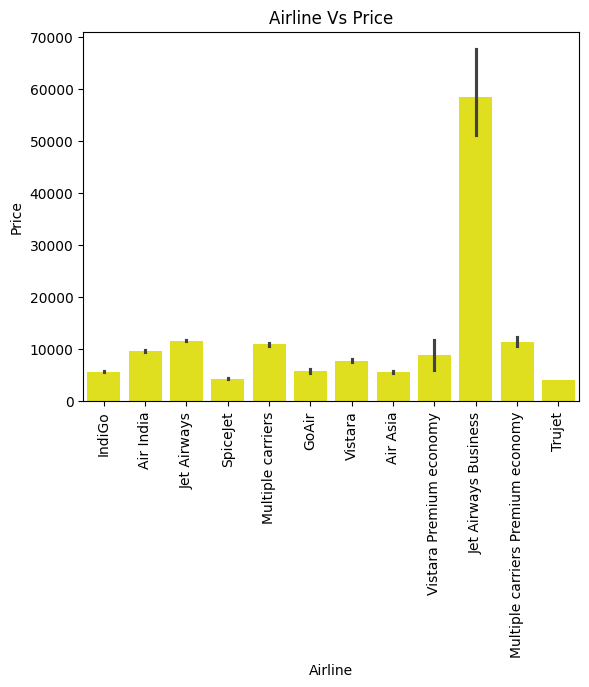

In [16]:
sns.barplot(data=data, x="Airline", y="Price" , color="yellow")
plt.xticks(rotation=90)
plt.title("Airline Vs Price")
plt.show()

# Insights
* Airline Jet Airways Business consistently has the highest prices, this may indicates a lack of budget options.
* Airline spicejet , Indigo and Trujet are densely at a lower range indicating a budget airline with low fares.

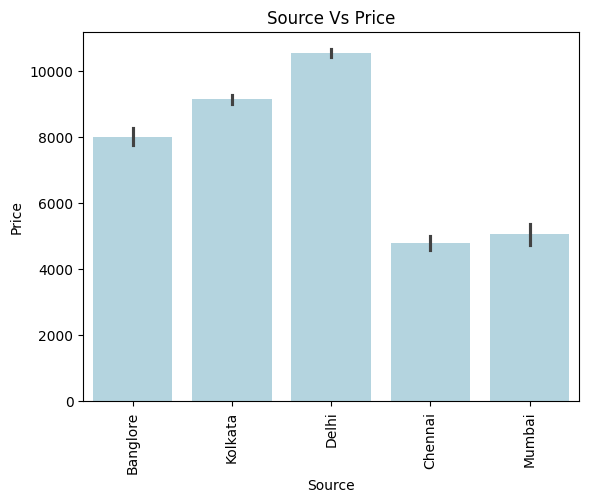

In [21]:
sns.barplot(data=data, x="Source", y="Price" , color="lightblue")
plt.xticks(rotation=90)
plt.title("Source Vs Price")
plt.show()

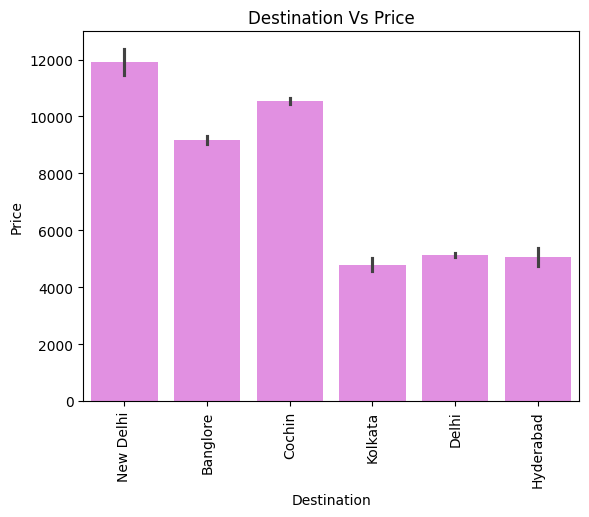

In [19]:
sns.barplot(data=data, x="Destination", y="Price" , color="violet")
plt.xticks(rotation=90)
plt.title("Destination Vs Price")
plt.show()

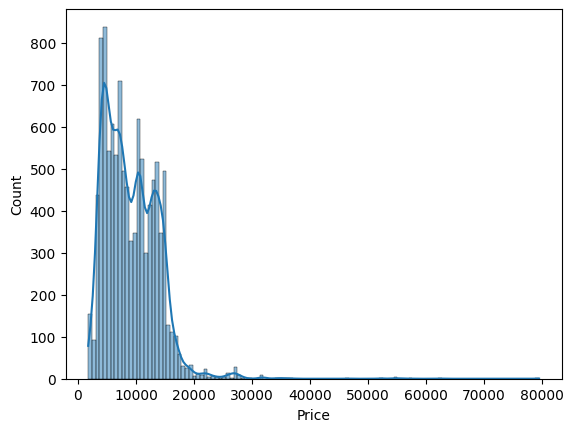

In [26]:
sns.histplot(x="Price",data=data,kde=True)
plt.show()

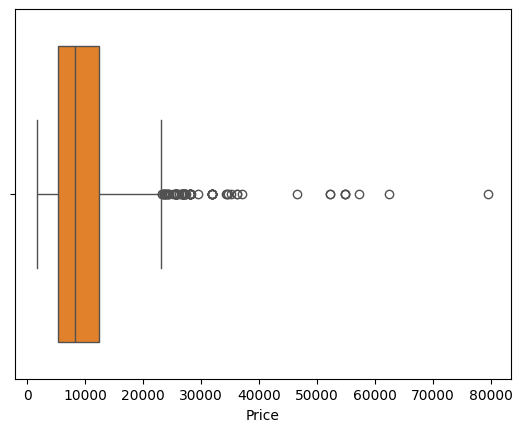

In [44]:
sns.boxplot(x="Price",data=data)
plt.show()

# Insights
* The price column shows multimodel and slightly skewed in right side.
* The price ranges mostly vary from 5200$ to 15000 $.
* The average price of the flight fare shows around 9087$.
* But also there are some expensive fare price in the dataset.

# Data Preprocessing

In [4]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.duplicated().sum()

220

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.shape

(10463, 11)

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.shape

(10462, 11)

# Insights
* Before handling null and duplicate values there are 10683 rows and 11 columns.
* After dropped duplicates and null values there are 10462 rows and 11 columns.

# Date_of_Journey:

* We can see that Date_of_Journey is a object data type.

* Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

* For this we require pandas to_datetime to convert object data type to datetime dtype.

* Here we dont need to calculate year because all the data representing same year

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [9]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [11]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [12]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Dep_Time:

* Departure time is when a plane leaves the gate. 

* Similar to Date_of_Journey we can extract values from Dep_Time

In [13]:
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [14]:
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Arrival_Time:

* Arrival time is when the plane pulls up to the gate.
* Similar to Date_of_Journey we can extract values from Arrival_Time

In [16]:
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [17]:
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Duration:

* Extracting Hour and Minute from "Duration" column.
* Time taken by a plane to reach its destination is known as "Duration".
* It is the difference between "Dep_Time" and "Arrival_Time".
* First of all, We will Convert "Duration" column to pandas "Timedelta" and then we will extract Duration_Hours and Duration_Minutes from that.

In [19]:
data['Duration'] = pd.to_timedelta(data['Duration'])

In [20]:
data['Duration_Hours'] = data["Duration"].dt.components['hours']
data['Duration_Minutes'] = data["Duration"].dt.components['minutes']

In [21]:
data.drop(["Duration"], axis=1, inplace=True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [24]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [25]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  int64 
 4   Price             10462 non-null  int64 
 5   Journey_day       10462 non-null  int32 
 6   Journey_month     10462 non-null  int32 
 7   Dep_hour          10462 non-null  int32 
 8   Dep_min           10462 non-null  int32 
 9   Arrival_hour      10462 non-null  int32 
 10  Arrival_min       10462 non-null  int32 
 11  Duration_Hours    10462 non-null  int64 
 12  Duration_Minutes  10462 non-null  int64 
dtypes: int32(6), int64(4), object(3)
memory usage: 899.1+ KB


# Handling Categorical Data

#One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

The column Airline, Source and Destination are nominal categorical data. so, here we can use One Hot Encoding.

# Airline:

In [30]:
data["Airline"].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

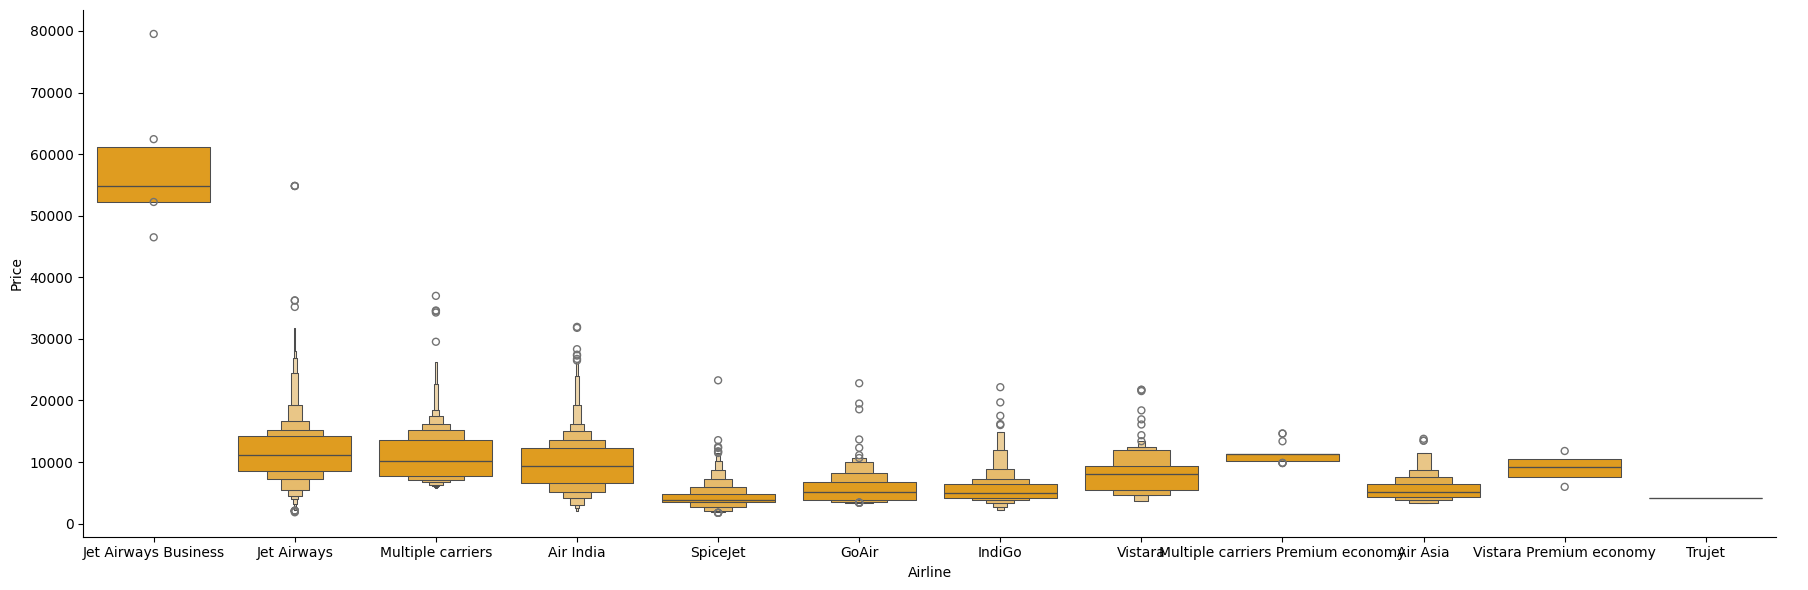

In [31]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen",color="orange",height = 6, aspect = 3)
plt.show()

In [27]:
#As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True,dtype=int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


# Source:

In [33]:
data["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

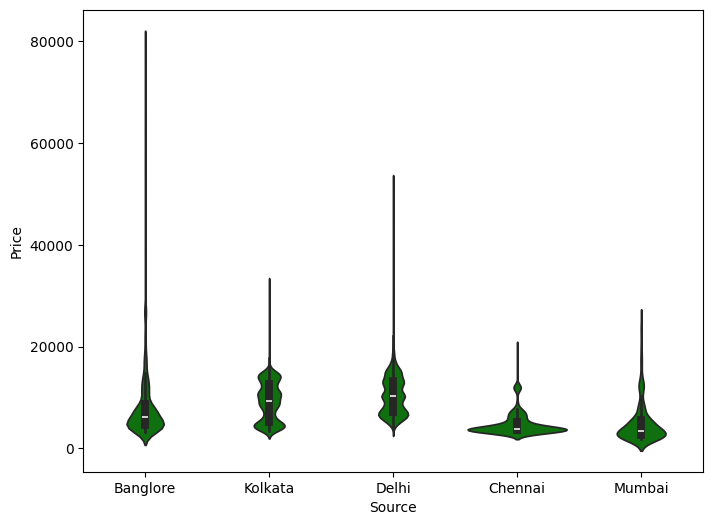

In [34]:
plt.figure(figsize=(8,6))
sns.violinplot(data=data, x="Source",y="Price",color="green")
plt.show()

In [28]:
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True, dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# Destination:

In [36]:
data["Destination"].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

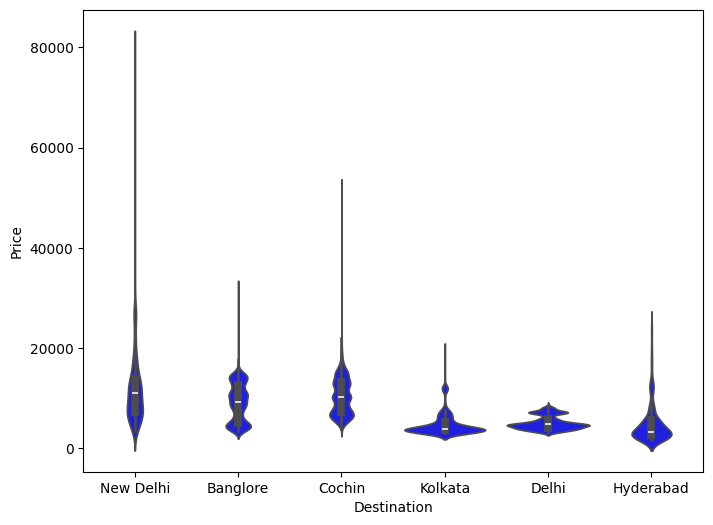

In [37]:
plt.figure(figsize=(8,6))
sns.violinplot(data=data, x="Destination",y="Price",color="blue")
plt.show()

In [29]:
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True, dtype=int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
final_data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [31]:
final_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
final_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [41]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10462 non-null  int64
 1   Price                                      10462 non-null  int64
 2   Journey_day                                10462 non-null  int32
 3   Journey_month                              10462 non-null  int32
 4   Dep_hour                                   10462 non-null  int32
 5   Dep_min                                    10462 non-null  int32
 6   Arrival_hour                               10462 non-null  int32
 7   Arrival_min                                10462 non-null  int32
 8   Duration_Hours                             10462 non-null  int64
 9   Duration_Minutes                           10462 non-null  int64
 10  Airline_Air India                          10462 no

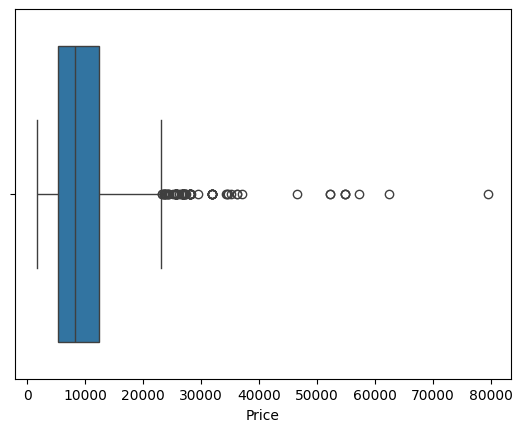

In [42]:
sns.boxplot(x="Price",data=final_data)
plt.show()

# Handling outliers:
As there is some outliers in price feature,so we replace it with median.

In [32]:
final_data['Price']=np.where(final_data['Price']>=40000,final_data['Price'].median(),final_data['Price'])

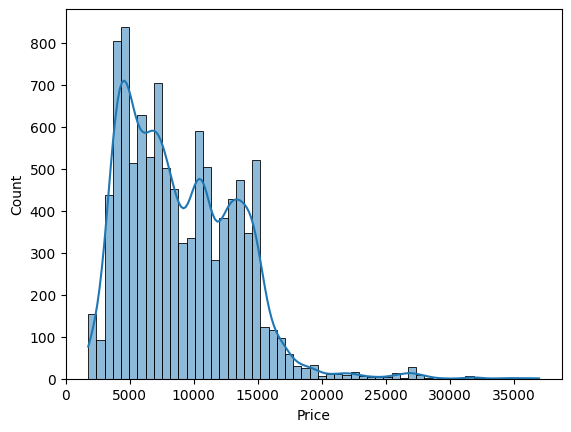

In [33]:
sns.histplot(x="Price",data=final_data,kde=True)
plt.show()

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. 
Following are some of the feature selection methods,

heatmap

feature_importance_

SelectKBest

In [45]:
final_data.shape

(10462, 30)

In [46]:
final_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Feature Engineering

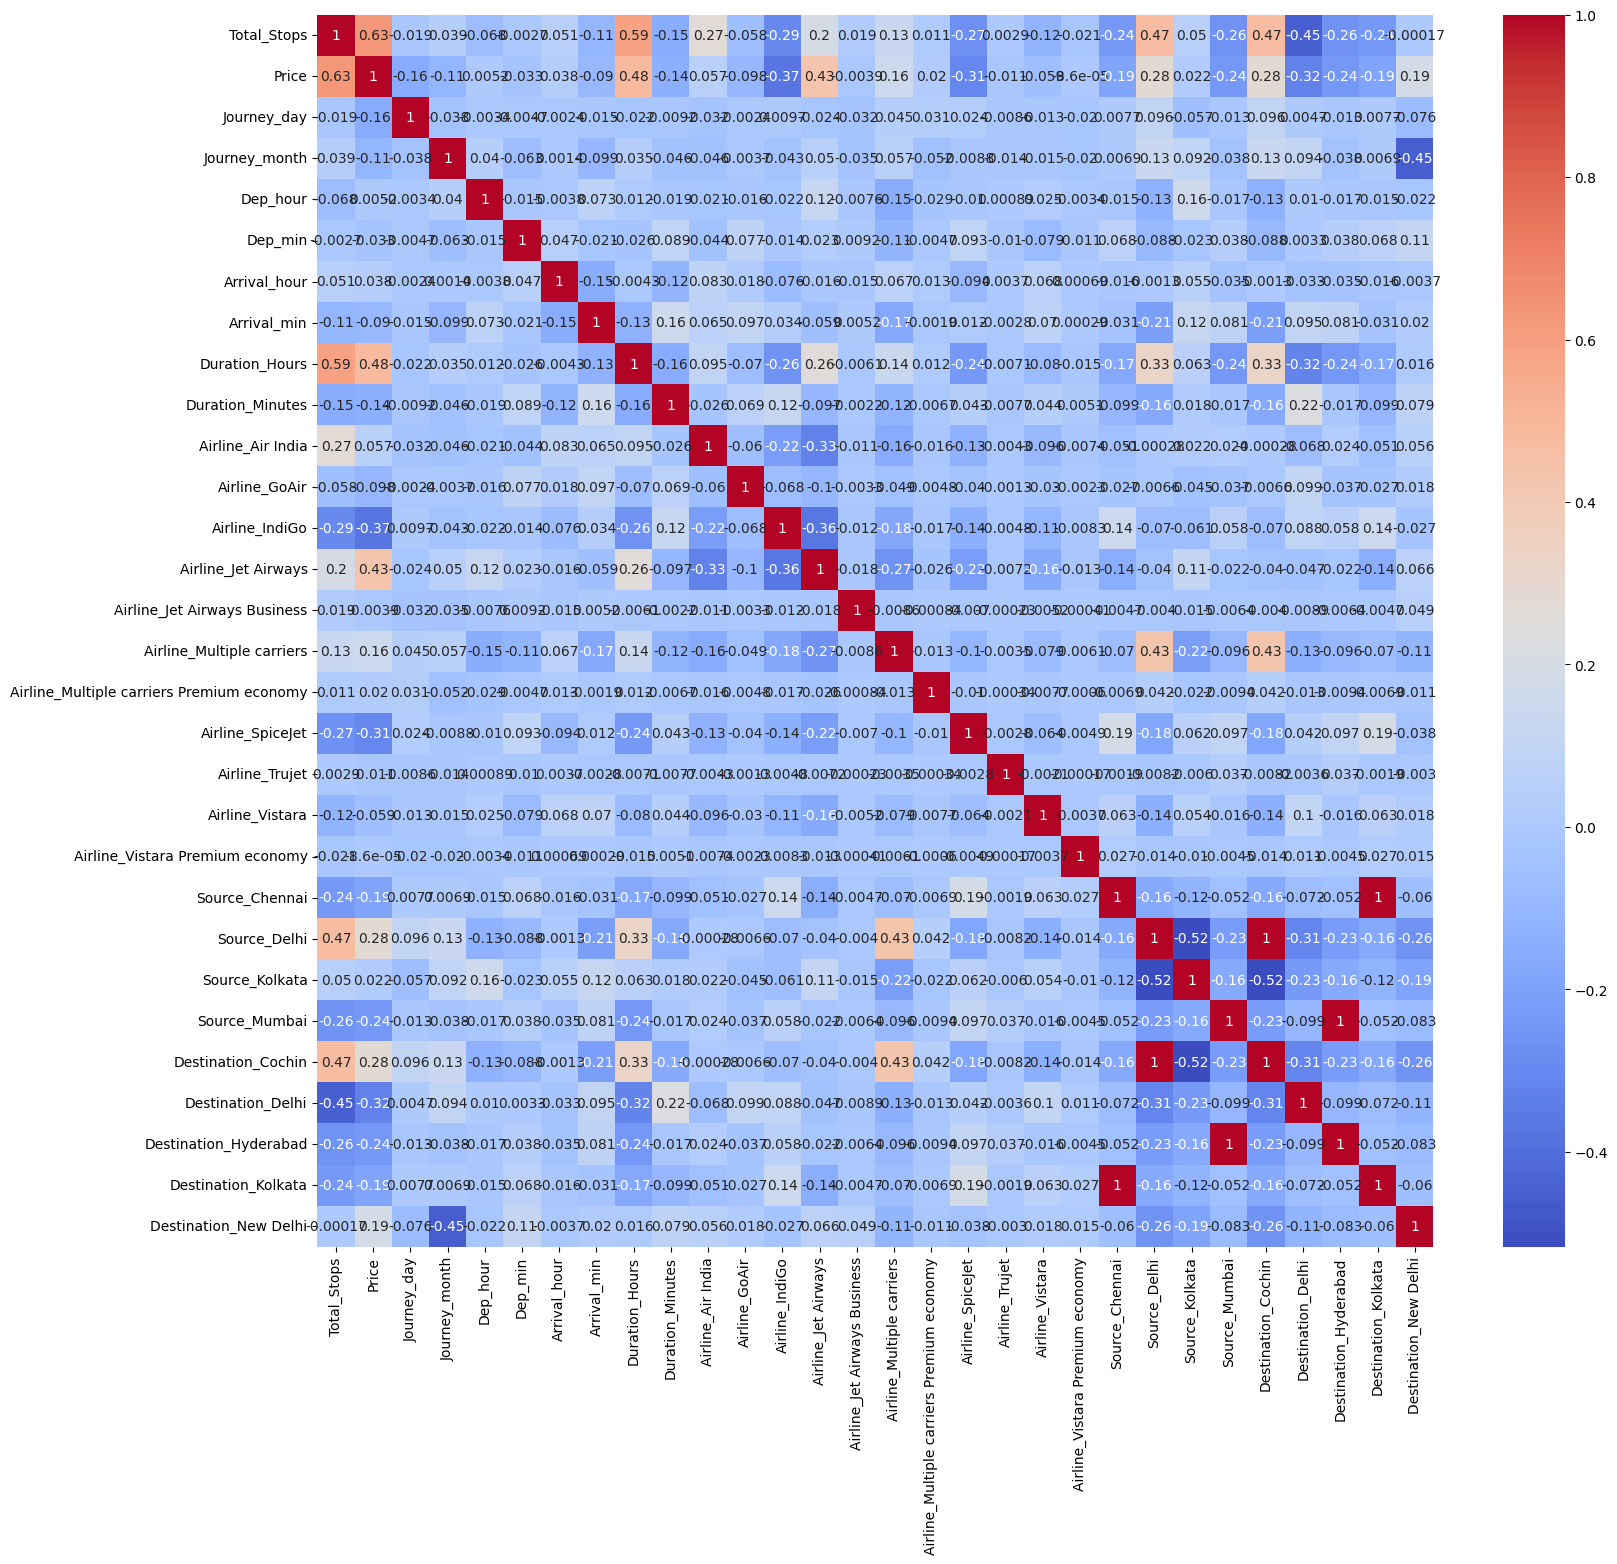

In [47]:
#Heatmap
plt.figure(figsize = (18,16))
sns.heatmap(final_data.corr(), annot = True, cmap ="coolwarm")
plt.show()

In [34]:
X=final_data.drop("Price",axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
y=final_data.Price
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [37]:
X_train.shape

(7846, 29)

In [38]:
X_test.shape

(2616, 29)

# Scaling:

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
print(X_train_scaled)

[[0.66666667 0.30769231 0.66666667 ... 0.         0.         0.        ]
 [0.         0.76923077 0.33333333 ... 0.         0.         0.        ]
 [0.         0.88461538 1.         ... 1.         0.         0.        ]
 ...
 [0.33333333 0.07692308 0.33333333 ... 0.         0.         0.        ]
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.30769231 0.66666667 ... 0.         1.         0.        ]]


# Model Building:

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train_scaled,y_train)
    print("Training score: {}".format(model.score(X_train_scaled,y_train)))
    print("Testing Score: {}".format(model.score(X_test_scaled,y_test)))
    y_pred = model.predict(X_test_scaled)
    print("Predictions are: {}".format(y_pred))
    print('\n')
    
     
    print('MAE:{}'.format(mean_absolute_error(y_test,y_pred)))
    print('MSE:{}'.format(mean_squared_error(y_test,y_pred)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print('\n')
    
    
    r2score=r2_score(y_test,y_pred) 
    print("r2 score is: {}".format(r2score))
    
    n=len(y_test)
    k=29
    Adj_r2score=1 - ((1 - r2score) * (n - 1)) / (n - k - 1)
    print("Adjusted_r2 score is: {}".format(Adj_r2score))
    sns.histplot(y_test-y_pred,kde=True) 
    plt.show()
    

# 1. Linear Regression

Model is: LinearRegression()
Training score: 0.611418370352367
Testing Score: 0.6087305482225066
Predictions are: [14221.   4452.   4764.  ... 11412.  12608.5  4400. ]


MAE:1964.8398318042814
MSE:7611764.839067278
RMSE:2758.9427031142345


r2 score is: 0.6087305482225066
Adjusted_r2 score is: 0.6043427624137103


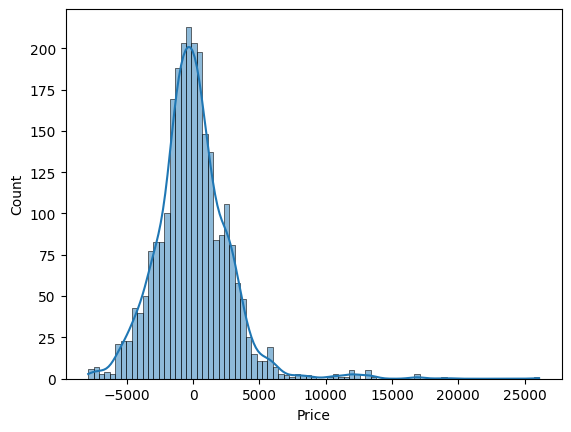

In [57]:
predict(LinearRegression())

# 2. KNN

Model is: KNeighborsRegressor()
Training score: 0.8379195128467485
Testing Score: 0.7639092409198367
Predictions are: [17051.4  3847.4  4336.8 ... 14151.  12888.2  4173.8]


MAE:1393.2733180428133
MSE:4592915.011972477
RMSE:2143.1087261201837


r2 score is: 0.7639092409198367
Adjusted_r2 score is: 0.7612616647352564


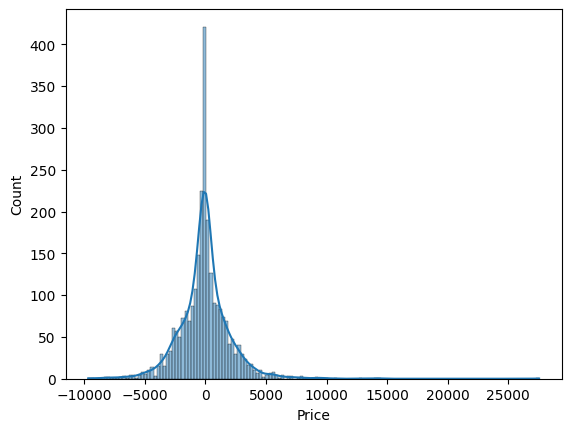

In [66]:
predict(KNeighborsRegressor(n_neighbors=5))

# 3. Decision Tree

Model is: DecisionTreeRegressor()
Training score: 0.9685140666157975
Testing Score: 0.6761715640275716
Predictions are: [14158.5  3841.   4148.  ... 14151.  10844.   3841. ]


MAE:1426.2176987767584
MSE:6299765.779381159
RMSE:2509.9334213044694


r2 score is: 0.6761715640275716
Adjusted_r2 score is: 0.6725400773132637


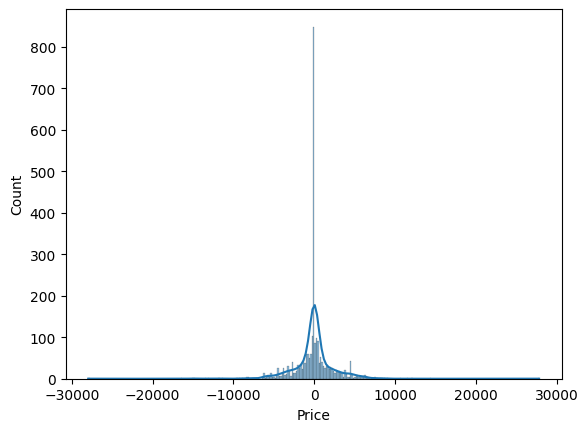

In [61]:
predict(DecisionTreeRegressor())

# 4. GradientBoosting

Model is: GradientBoostingRegressor()
Training score: 0.7787022306610131
Testing Score: 0.7595676456452063
Predictions are: [14295.12903711  4008.78971711  4837.76849013 ... 11764.41131151
 12193.84539887  3594.108167  ]


MAE:1545.7741739386756
MSE:4677376.505469509
RMSE:2162.724324889677


r2 score is: 0.7595676456452063
Adjusted_r2 score is: 0.7568713818106011


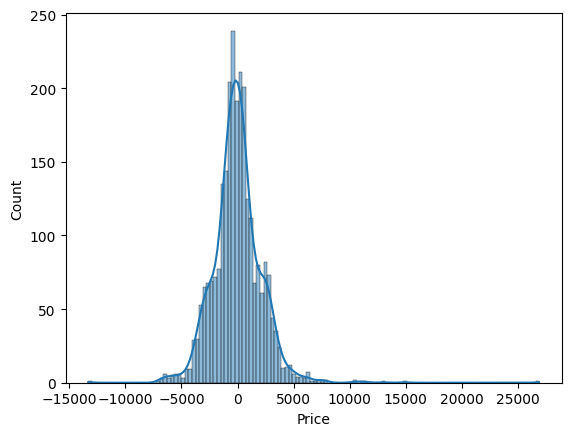

In [43]:
predict(GradientBoostingRegressor())

# 5. RandomForest

Model is: RandomForestRegressor()
Training score: 0.9538014423897196
Testing Score: 0.8035128546515696
Predictions are: [15106.05283333  3837.46        4267.99666667 ... 13835.078
 11628.29416667  4037.62566667]


MAE:1184.213984985559
MSE:3822465.407144558
RMSE:1955.1126328538103


r2 score is: 0.8035128546515696
Adjusted_r2 score is: 0.8013094025188919


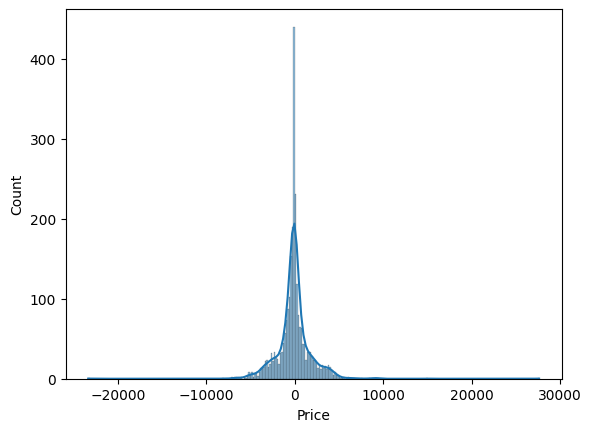

In [63]:
predict(RandomForestRegressor())

# 6. XGBoost

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
Training score: 0.9326947177984771
Testing Score: 0.8346687385709864
Predictions are: [14013.9795  3918.093   4105.2505 ... 13170.803  12208.605   4040.418 ]


MAE:1149.7489758412773
MSE:3216358.1307637235
RMSE:1793.420790211746


r2 score is: 0.83466873857098

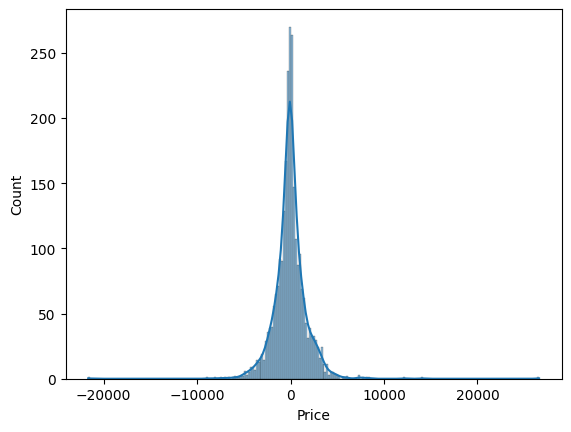

In [64]:
predict(XGBRegressor())

# HyperParameter Tuning

# 1. RandomForest

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220,280],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20,25],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'min_samples_split': [2, 3, 10, 15, 20]
    }

In [201]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train_scaled,y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 280,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 15}

In [205]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(
  n_estimators=280,
  min_samples_split = 2,
  min_samples_leaf = 4,
  max_features = 'auto',
  max_depth = 15 )
model_RFR.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=4,
                      n_estimators=280)

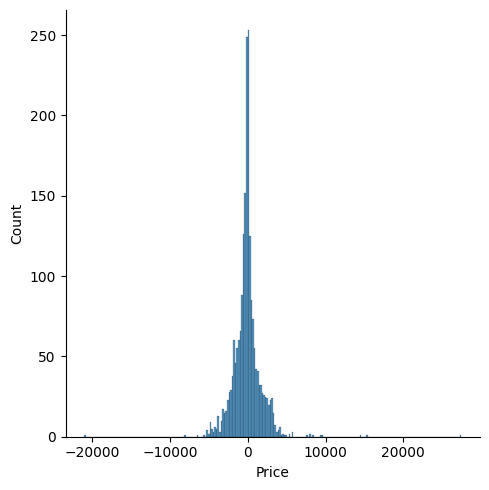

In [206]:
prediction = rf_random.predict(X_test_scaled)
sns.displot(y_test-prediction)
plt.show()

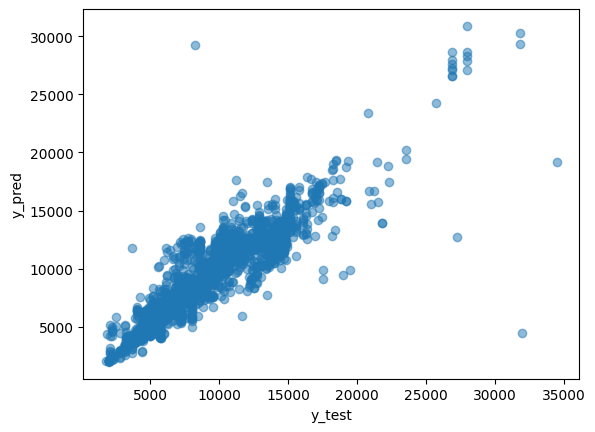

In [207]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [208]:
r2_score(y_test,prediction)

0.828892082519082

# 2. Gradient Boosting

In [44]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [100, 200, 500,1000],
    'learning_rate' : [0.01, 0.1, 0.5, 1.0],
    'max_depth' : [3,5,9,11],
    'min_samples_split' : [2,4,8,10],
    'min_samples_leaf' : [1,2,4,8],
    'subsample' : [0.8, 0.9, 1.0,2.0]
}

In [45]:
gbr = GradientBoostingRegressor()
model_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=100,  
    cv=4,
    verbose=2,
    random_state = 42,
    n_jobs=-1,
)

In [46]:
model_gbr.fit(X_train_scaled,y_train)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [3, 5, 9, 11],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0, 2.0]},
                   random_state=42, verbose=2)

In [47]:
model_gbr.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_depth': 5,
 'learning_rate': 0.1}

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(subsample = 1.0,n_estimators = 500, min_samples_split = 4,min_samples_leaf = 8,learning_rate = 0.1,max_depth = 5)
gbr_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=4,
                          n_estimators=500)

In [224]:
y_prediction=gbr_model.predict(X_test_scaled)

In [225]:
y_prediction

array([14771.17029972,  3686.94612131,  3766.52046528, ...,
       10796.38933112,  7856.19053683, 12593.40834399])

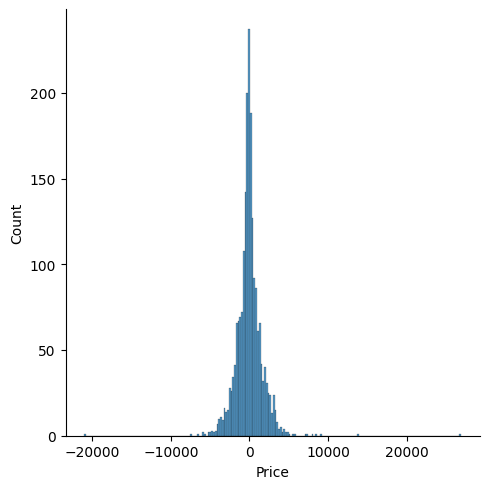

In [228]:
predict=model_gbr.predict(X_test_scaled)
sns.displot(y_test-predict)
plt.show()

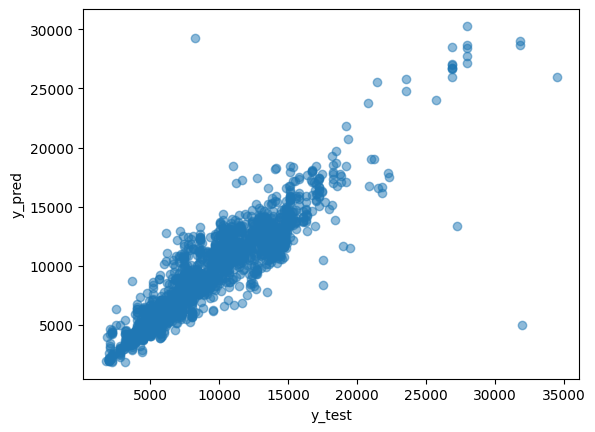

In [230]:
plt.scatter(y_test, predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [226]:
r2_score(y_test,y_prediction)

0.8466543013702825

In [49]:
import pickle

# dump information to that file
pickle.dump(gbr_model, open('flight_fare.pkl', 'wb'))

In [51]:
file = open('flight_fare.pkl','rb')
loaded_model = pickle.load(file)

# Project Outcomes:

In [94]:
def result(models):
    results = []
    for model in models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': model.__class__.__name__,
            'R²': r2,
        })
    
    return pd.DataFrame(results)

models = models=[LinearRegression(), KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),
                 GradientBoostingRegressor(),XGBRegressor()]
results_df = result(models)
print(results_df)

                       Model        R²
0           LinearRegression  0.608731
1        KNeighborsRegressor  0.763909
2      DecisionTreeRegressor  0.682761
3      RandomForestRegressor  0.805546
4  GradientBoostingRegressor  0.759568
5               XGBRegressor  0.834669


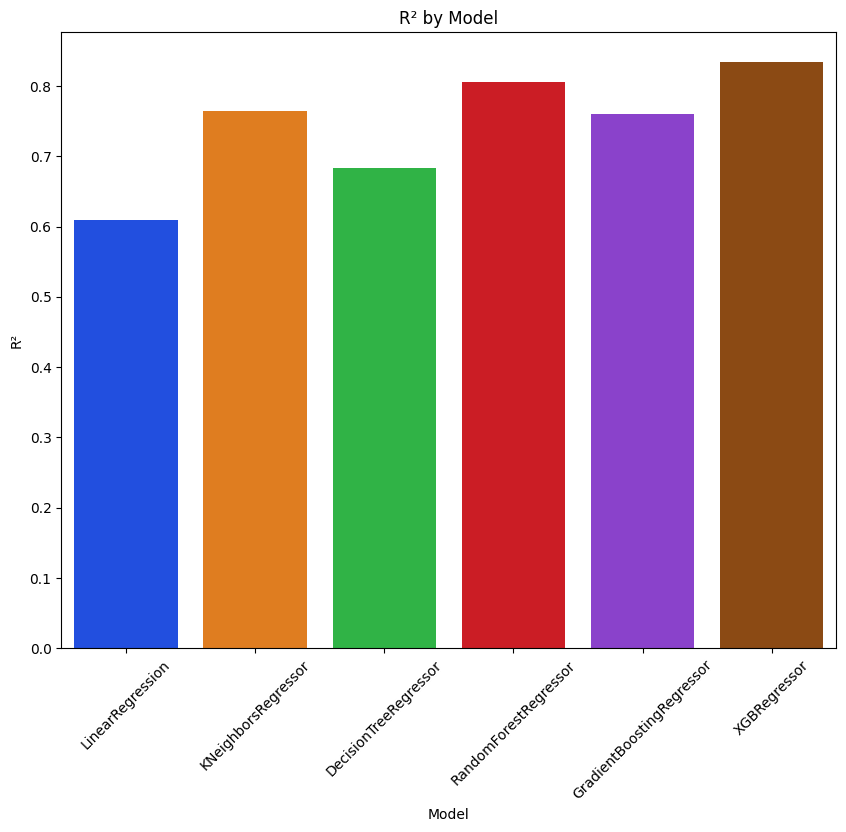

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x="Model",y="R²",data=results_df,palette='bright')
plt.xticks(rotation=45)
plt.title("R² by Model")
plt.show()

# Conclusion:

* To solve this pbroblem using multiple machine learning models which will help the customers to predict future flight prices and plan their journey.


* For this purpose of this analysis to compare the performance models by using six regression models such as LinearRegression, KNeighborsRegressor,DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, and XGBRegressor.


* Mean Absolute Error(MAE), Mean Squared Error(MAE), Root Mean Squared Error(RMSE), R²Score and adjusted R2score used as evaluation metrics.


* R²score indicates the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² score indicates better model performnce.


* By comparing R²score we can clearly see that XGBRegressor(0.83),RandomForestRegressor(0.80) algorithm performed well followed by GradientBoostingRegressor(0.76) and KNeighborsRegressor(0.75) also quite well performed but DecisionTreeRegressor(0.68)  and LinearRegression(0.60) is slightly lag behind all the models.


* But After done hyperparameter tuning using RandomSearchCV we see GradientBoostingRegressor get R²score as 0.84 and RandomForestRegressor(0.82)


* Based on the analysis, If the goal is purely predictive performance on this dataset, GradientBoostingRegressor would be the best model for this dataset.

# CHALLENGES FACED

# Data Preprocessing:

* In data preprocessing, Converting the date_of_journey column to timestamp seems difficult step and converting the Duration column using timedelta function for extracting minutes and hours to find difficult to done.

# Hyperparameter Tuning:

 * While doing hyperparameter its trying out all the possibilities can consume a lot of computer power. Here we used RandomsearchCV to get more efficiently. It performed well but it takes a lot of time to get best parameters.